# BURGERS EQUATION--NFC


Here we solve the burgers equation $u_t + u u_x=0$ using as an initial condition a gaussian profile $u(x,t=0)=10\times\exp{[-(x-x_0)^2]}$ with $x_0=5$.

We use a domain $x\in [0,10]$ with periodic boundary conditions.

Compute the solution using both the flux-conservative and the non fluxconservative versions of the upwind scheme. Use Courant factor cf = 0.5, a grid with at least
J = 101 points with periodic boundary conditions, and terminate the evolution at t = 0.5.
Compare the solutions computed with the two different methods. What happens when you increase the resolution?

In [74]:
import numpy as np

#define the speed a
a=1.0

# Define the domain
L = 10.0     # Domain length
nx = 101    #changing nx the resolution change (J)
dx = L/(nx-1)   # Grid spacing
x = np.linspace(0, L, nx)

##print(x,'\n',dx) #just a check

# Define the initial condition
x0=5
u_initial = 10*np.exp(-(x-x0)**2)

# Initialize the solution array
u_current = u_initial.copy()

# Define the time step and the final time
cf = 0.5            # Courant factor 
dt = cf*dx/np.max(u_current)   # Time step: take the max of u_current cause it is the biggest light cone
t_final = 0.5 

print('nx=',nx)
print('dx=',dx)
print('dt=',dt)
print('Number of iterations=',t_final/dt)

l2norm=[]
l2norm.append(np.sqrt(np.sum(u_current**2)/len(u_current)))

time=[]
time.append(0.0)


nx= 101
dx= 0.1
dt= 0.005
Number of iterations= 100.0


In [52]:
import matplotlib.pyplot as plt
import os

os.makedirs('./Burger_FC', exist_ok=True)

os.listdir('./');

In [75]:
# Initilize time and iteration counter
t = 0.0
i = 0

u_iter=[]
t_iter=[]

#save the initial conditions
plt.plot(x, u_current)
plt.title('Time='+str(round(t,2)))
plt.xlabel('x')
plt.ylabel('u)')
plt.savefig('./Burger_FC/fig_'+str(i).zfill(5)+'.png', dpi=200)
plt.close()

#solve the advection equation
while t < t_final:
    # Compute the new solution using the FTCS method
    # Note: np.roll(u_current, -1) is equivalent to u(j+1) and
    #       np.roll(u_current,  1) is equivalent to u(j-1)
    # using np.roll is equivalent to use periodic boundary conditions
    u_next = u_current - dt/(2*dx)*(u_current**2 - np.roll(u_current, 1)**2)   
    dt = cf*dx/np.max(u_current)    
    
    # Update the solution
    u_current = u_next.copy()
    
    
    #advance the time 
    t += dt
    i += 1
    
    #compute the l2 norm and add the time to the time vector
    #change them for aLL the three cases
    l2norm.append(np.sqrt(np.sum(u_current**2)/len(u_current)))
    time.append(t)
    
    #plot the current result and save in an image every 10 iterations
    if (i%5==0):
        u_iter.append(u_current)
        t_iter.append(t)
        plt.plot(x, u_current)
        plt.title('Time='+str(round(t,2)))
        #plt.ylim(0,1.1)
        plt.xlabel('x')
        plt.ylabel('u(x)')
        plt.savefig('./Burger_FC/fig_'+str(i).zfill(5)+'.png', dpi=200)
        plt.close()


np.save('./Burger_FC/l2norm'+str(nx)+'.npy', np.array(l2norm)) 
np.save('./Burger_FC/time'+str(nx)+'.npy', np.array(time))

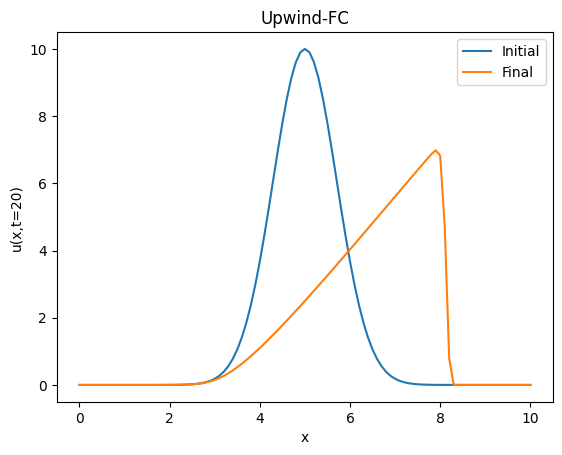

In [ ]:
# Plot the final solution
plt.plot(x, u_initial, label='Initial')
plt.plot(x, u_current, label='Final')
plt.title('Upwind-FC')
plt.xlabel('x')
plt.ylabel('u(x,t=20)')
plt.legend()
plt.savefig('./Burger_FC/final'+str(nx)+'.png', dpi=200)
plt.show()

np.save('./Burger_FC/SOL'+str(nx)+'.npy', np.array(u_current))
np.save('./Burger_FC/x'+str(nx)+'.npy', np.array(x))

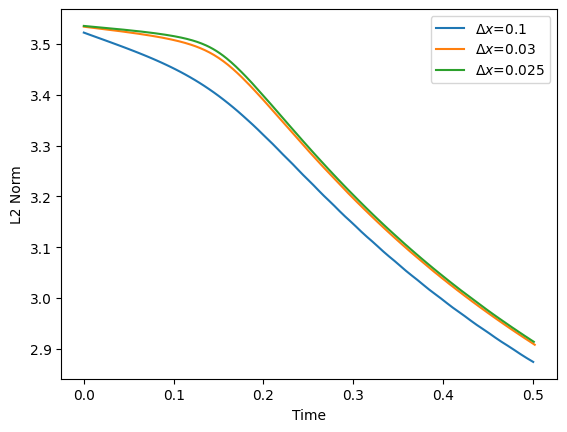

In [77]:
norm1=np.load('Burger_FC/l2norm101.npy')
time1=np.load('Burger_FC/time101.npy')
norm2=np.load('Burger_FC/l2norm301.npy')
time2=np.load('Burger_FC/time301.npy')
norm3=np.load('Burger_FC/l2norm401.npy')
time3=np.load('Burger_FC/time401.npy')


plt.plot(time1,norm1, label='$\Delta x$=0.1')
plt.plot(time2,norm2, label='$\Delta x$=0.03')
plt.plot(time3,norm3, label='$\Delta x$=0.025')


plt.xlabel('Time')
plt.ylabel('L2 Norm')
plt.legend()
plt.savefig('./Burger_FC/l2norm.pnglast'+str(nx)+'.png', dpi=200)
plt.show()

Comparison between the FC and NFC

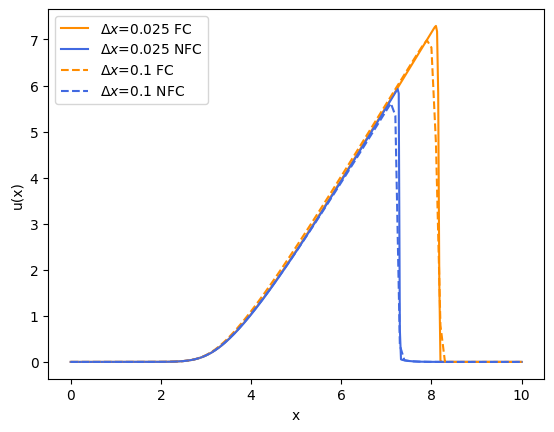

In [76]:
FC1=np.load('Burger_FC/SOL401.npy')
NFC1=np.load('Burger_NFC/SOL401.npy')
x1=np.load('Burger_FC/x401.npy')
FC2=np.load('Burger_FC/SOL301.npy')
NFC2=np.load('Burger_NFC/SOL301.npy')
x2=np.load('Burger_FC/x301.npy')
FC3=np.load('Burger_FC/SOL101.npy')
NFC3=np.load('Burger_NFC/SOL101.npy')
x3=np.load('Burger_FC/x101.npy')

plt.plot(x1, FC1, label='$\Delta x$=0.025 FC', color='darkorange')
plt.plot(x1, NFC1, label='$\Delta x$=0.025 NFC', color='royalblue')
# plt.plot(x2, FC2, label='FC')
# plt.plot(x2, NFC2, label='NFC')
plt.plot(x3, FC3, label='$\Delta x$=0.1 FC', color='darkorange', linestyle='--')
plt.plot(x3, NFC3, label='$\Delta x$=0.1 NFC', color='royalblue', linestyle='--')
plt.legend()
plt.xlabel('x')
plt.ylabel('u(x)')
plt.savefig('./Burger_FC/FC_NFC.png', dpi=200)
plt.show()